# REGRESSION DATASET GENERATOR AND PREPROCESSING. 

## INITIALIZE 

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
from math import sqrt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True,precision=3)
plt.rcParams['figure.figsize']=(12,12)

## LOAD DATA

#### Being able to synthesize datasets is a handy tool for exploring algorithms. 

In [113]:
#sklearn.datasets has a module specifically for regression sets!
from sklearn.datasets import make_regression

#### We will be predicting target y using features a,b, and c.

In [116]:
x,y = make_regression(n_samples = 100, n_features = 3,n_informative=2)
data = pd.DataFrame(x,columns = ['a','b','c'])
data['y']=y
data[:10]

,a,b,c,y
0,1.616103,1.009947,-0.761812,43.975381
1,-0.459723,1.553707,0.243400,-11.843439
2,-1.010051,-0.279338,0.557897,-25.443998
3,1.015656,2.040517,-0.108253,36.881420
4,-1.172813,1.727137,0.343961,-37.125060
5,1.528399,-1.130287,2.925774,132.565610
6,0.450759,-0.123665,-0.318603,9.617702
7,-2.311714,2.207860,0.632015,-74.323444
8,1.162776,-0.393223,0.899068,67.748487
9,0.942246,-1.141797,-1.408255,1.584349


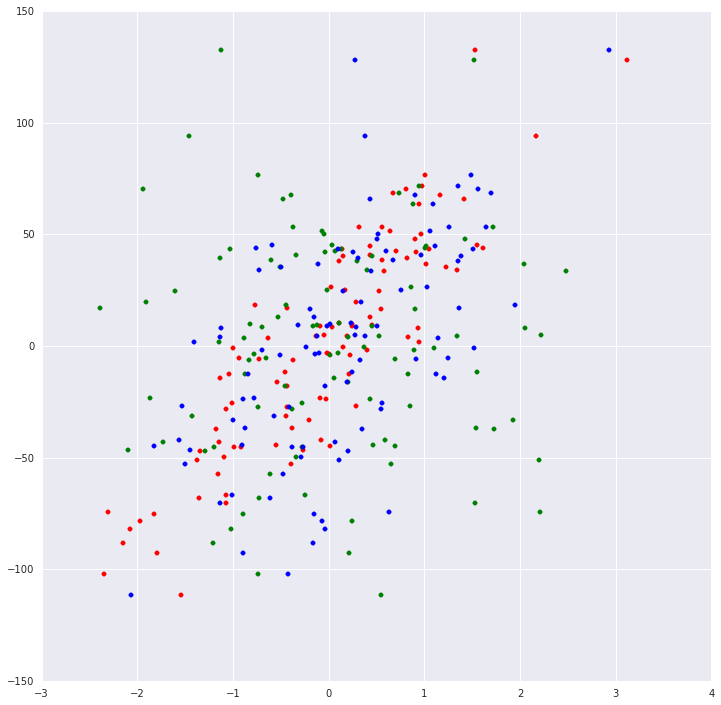

In [117]:
plt.figure()
plt.scatter(data['a'],data['y'],color='r')
plt.scatter(data['b'],data['y'],color='g')
plt.scatter(data['c'],data['y'],color='b')
plt.show()

#### The data has a definite linearity to it, with green being the least predictive while blue and red are about evenly clustered around the line, though blue has wider wings.  


<b>Data looks good, let's save it:

In [2]:
data.to_csv('datagen.csv')

In [4]:
data = pd.read_csv('datagen.csv',index_col = 0)
data[:10]

,a,b,c,y
0,1.616103,1.009947,-0.761812,43.975381
1,-0.459723,1.553707,0.243400,-11.843439
2,-1.010051,-0.279338,0.557897,-25.443998
3,1.015656,2.040517,-0.108253,36.881420
4,-1.172813,1.727137,0.343961,-37.125060
5,1.528399,-1.130287,2.925774,132.565610
6,0.450759,-0.123665,-0.318603,9.617702
7,-2.311714,2.207860,0.632015,-74.323444
8,1.162776,-0.393223,0.899068,67.748487
9,0.942246,-1.141797,-1.408255,1.584349


## SCALING THE DARA:
#### Regularization methods like penalized linear regression work better when the data is standardized (has a mean of 0 and a unit variance of 1). 

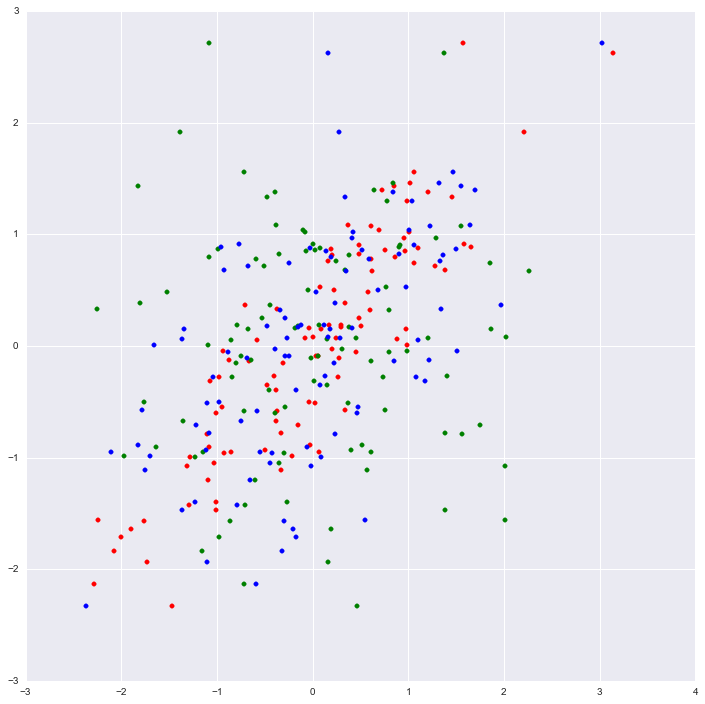

In [15]:
from sklearn.preprocessing import scale
scale_data = scale(data)
scale_data = pd.DataFrame(scale_data,columns=['a','b','c','y'])

data.to_csv('datagen.csv')

plt.figure()
plt.scatter(scale_data['a'],scale_data['y'],color='r')
plt.scatter(scale_data['b'],scale_data['y'],color='g')
plt.scatter(scale_data['c'],scale_data['y'],color='b')
plt.show()

---

## SPLIT THE DATA INTO TEST AND VALIDATION SETS:

In [6]:
from sklearn import cross_validation

In [17]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(scale_data.values[:,:3],
                                   scale_data.values[:,3],test_size=.3, random_state=7)

np.save('datagen_xtrain',x_train)
np.save('datagen_ytrain',y_train)
np.save('datagen_xtest',x_test)
np.save('datagen_ytest',y_test)

## This data will be used to test the LARS algorithm to be implemented in A1…

---